# Country analysis
<p>Autor: Rômulo Lima Gava <br>
Data: 09/12/2020<br>
Location: São Paulo, Brazil</p>
Analysis of suicide rates using Brazil data from kaggle<br>
Url: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv

## Setup:

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Data/master.csv")
country="Austria"
year=2015

## Functions:

getandreset:<br>
inputs:
<ul><li>df: (dataframe)</li>
<li>column: name of a df column (string)</li>
<li>target: column element (string)</li></ul><br>
returns: df_temp: filtered dataframe with column=target with reseted index

In [40]:
def getandreset(df,column,target):
    """
    df: dataframe
    column: string
    target: string
    return: dataframe
    """
    df_temp=df.loc[(df[column]==target)]
    df_temp.reset_index(drop=True, inplace=True)
    return df_temp
    

## Main:

In [41]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [42]:
countries=df['country'].value_counts()
#countries=countries[countries>40]
print(countries)

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64


In [43]:
df_country=getandreset(df,column="country",target=country)
df_country.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
2,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent
3,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,Boomers
4,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation


There are multiple comparative ways to analyse the data:
<ul><li>Male x Female over the years</li>
<li>Male x female pie chart in most recent data</li>
<li>Generations X generation over the years</li>
<li>Generations X generation pie chart in most recent data</li>
<li>Age x Age over the years</li>
<li>Age x Age pie chart in most recent data</li> 
</ul>

## Male x Female

### Over the years

In [44]:
df_group=df_country.groupby(["year","sex"],as_index=False).sum()
print(df_group.columns)
df_group.head(5)

Index(['year', 'sex', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,female,624,3751216,96.99,4.584,58554
1,1985,male,1467,3358899,287.82,4.584,58554
2,1986,female,628,3751163,98.65,0.000,83466
3,1986,male,1511,3367986,303.15,0.000,83466
4,1987,female,624,3752067,99.23,0.000,104490


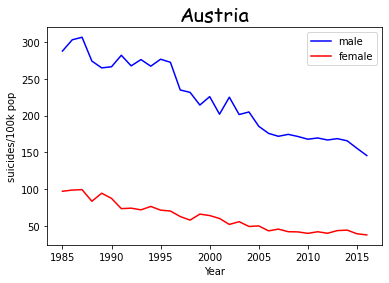

In [45]:
df_male=getandreset(df_group,column='sex',target='male')
df_female=getandreset(df_group,column='sex',target='female')

#data
plt.plot(df_male['year'],df_male["suicides/100k pop"], label='male', color='blue')
plt.plot(df_female['year'],df_female["suicides/100k pop"], label='female', color='red')

#Title
graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country, fontdict=graphdict)

#labels
plt.xlabel('Year')
plt.ylabel('suicides/100k pop')
# Add a legend
plt.legend()
plt.show()

### Pie chart

In [46]:
df_year=getandreset(df_country,column='year',target=year)
df_year.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Austria,2015,male,75+ years,214,290329,73.71,Austria2015,NaN,"382,065,930,308",46484,Silent
1,Austria,2015,male,55-74 years,294,915115,32.13,Austria2015,NaN,"382,065,930,308",46484,Boomers
2,Austria,2015,male,35-54 years,313,1279822,24.46,Austria2015,NaN,"382,065,930,308",46484,Generation X
3,Austria,2015,female,75+ years,70,461676,15.16,Austria2015,NaN,"382,065,930,308",46484,Silent
4,Austria,2015,male,25-34 years,78,590968,13.20,Austria2015,NaN,"382,065,930,308",46484,Millenials


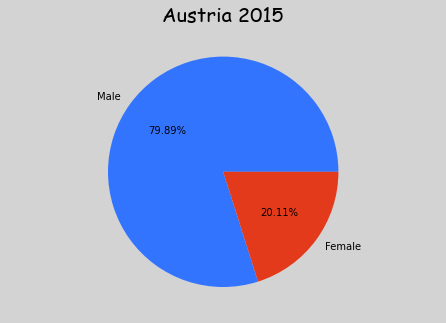

In [47]:
df_group2=df_year.groupby(["sex"],as_index=False).sum()

#getting data
df_male=getandreset(df_group2,column='sex',target='male')
df_female=getandreset(df_group2,column='sex',target='female')
numf=df_female['suicides/100k pop'][0]
numm=df_male['suicides/100k pop'][0]
names=['Male','Female']
nums=[numm,numf]

#plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country+" "+str(year), fontdict=graphdict)

fig.set_facecolor('lightgrey')

ax.pie(nums, labels = names,autopct='%1.2f%%',colors=['#3374ff','#e33a1c'])
plt.show()

## Generations

### Over the years

In [48]:
df_group=df_country.groupby(["year","generation"],as_index=False).sum()
print(df_group.columns)
df_group.head(5)

Index(['year', 'generation', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


,year,generation,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,Boomers,288,1093548,52.56,1.528,19518
1,1985,G.I. Generation,837,1922989,216.39,3.056,39036
2,1985,Generation X,265,2216253,41.25,3.056,39036
3,1985,Silent,701,1877325,74.61,1.528,19518
4,1986,Boomers,352,1122665,62.54,0.000,27822


In [49]:
df_group['generation'].value_counts()

Generation X       32
Silent             32
Boomers            31
Millenials         26
G.I. Generation    16
Generation Z        9
Name: generation, dtype: int64

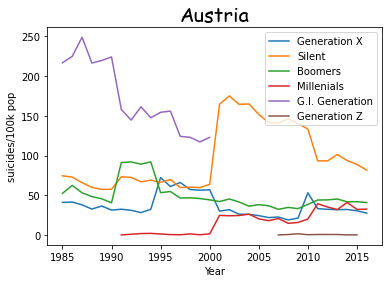

In [50]:
generations=df_group['generation'].value_counts()
for generation in generations.index:
    df_temp=getandreset(df_group,column='generation',target=generation)
    plt.plot(df_temp['year'],df_temp["suicides/100k pop"], label=generation)

#Title
graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country, fontdict=graphdict)

#labels
plt.xlabel('Year')
plt.ylabel('suicides/100k pop')
# Add a legend
plt.legend()
plt.show()

### pie chart

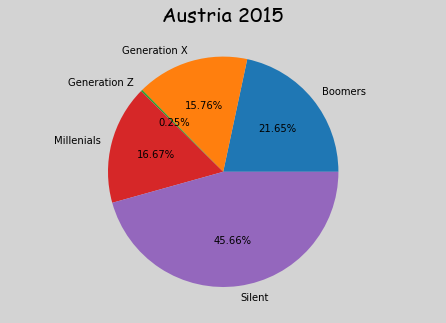

In [51]:
df_group2=df_year.groupby(["generation"],as_index=False).sum()

generations=df_group2['generation'].value_counts()
#getting data
nums=[]
names=[]
for generation in generations.index:
    df_temp=getandreset(df_group2,column='generation',target=generation)
    num=df_temp['suicides/100k pop'][0]
    nums.append(num)
    names.append(generation)


#plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country+" "+str(year), fontdict=graphdict)

fig.set_facecolor('lightgrey')

ax.pie(nums, labels = names,autopct='%1.2f%%')
plt.show()

## Age

### over the years

In [52]:
df_group=df_country.groupby(["year","age"],as_index=False).sum()
print(df_group.columns)
df_group.head(5)

Index(['year', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


,year,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,15-24 years,257,1287320,39.55,1.528,19518
1,1985,25-34 years,288,1093548,52.56,1.528,19518
2,1985,35-54 years,701,1877325,74.61,1.528,19518
3,1985,5-14 years,8,928933,1.70,1.528,19518
4,1985,55-74 years,575,1427231,86.86,1.528,19518


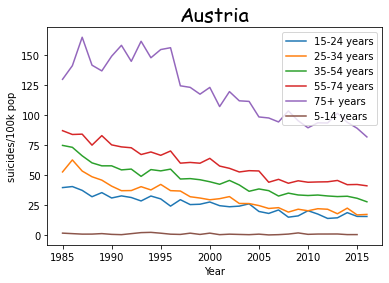

In [53]:

ages=df_group['age'].value_counts()
for age in ages.index:
    df_temp=getandreset(df_group,column='age',target=age)
    plt.plot(df_temp['year'],df_temp["suicides/100k pop"], label=age)

#Title
graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country, fontdict=graphdict)

#labels
plt.xlabel('Year')
plt.ylabel('suicides/100k pop')
# Add a legend
plt.legend()
plt.show()

### Pie chart

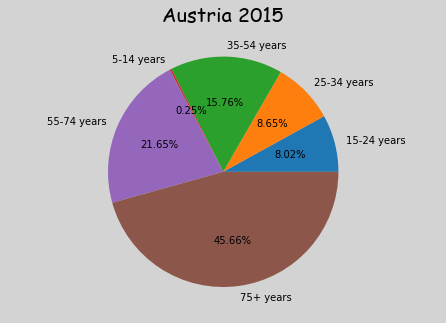

In [54]:
df_group2=df_year.groupby(["age"],as_index=False).sum()

ages=df_group2['age'].value_counts()
#getting data
nums=[]
names=[]
for age in ages.index:
    df_temp=getandreset(df_group2,column='age',target=age)
    num=df_temp['suicides/100k pop'][0]
    nums.append(num)
    names.append(age)


#plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country+" "+str(year), fontdict=graphdict)

fig.set_facecolor('lightgrey')

ax.pie(nums, labels = names,autopct='%1.2f%%')
plt.show()